# Setup môi trường

In [1]:
import os
print(os.getcwd())
os.chdir("../../..")
print(os.getcwd())

/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase2_280824/notebooks/train_module2/without_aug_data
/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase2_280824


# Setup data

In [2]:
import pandas as pd

# Đọc dữ liệu từ CSV
data_dir = './data/processed/'
train_df = pd.read_csv(data_dir + 'train_features.csv').drop(columns=['image_path'])
valid_df = pd.read_csv(data_dir + 'valid_features.csv').drop(columns=['image_path'])
test_df = pd.read_csv(data_dir + 'test_features.csv').drop(columns=['image_path'])

# data_dir = './data/augmented/'
# train_df_aug = pd.read_csv(data_dir + 'train_augmented_features.csv')

# Xem cấu trúc của DataFrame
print('Train DataFrame:')
print(train_df.head(3))
print('Valid DataFrame:')
print(valid_df.head(3))
print('Test DataFrame:')
print(test_df.head(3))
# print('Train Augmented DataFrame:')
# print(train_df_aug.head(3))

Train DataFrame:
   label     dim_0     dim_1     dim_2     dim_3     dim_4     dim_5  \
0      2  1.518592 -2.122206  1.063359  1.083591 -3.078244  1.832143   
1      2 -3.997844 -2.013066  5.606269 -2.221863  0.908517  0.995050   
2      2 -4.144322 -3.335181  7.014940 -2.851661 -1.254374  4.090703   

      dim_6     dim_7     dim_8  ...    dim_29    dim_30    dim_31    dim_32  \
0 -3.617894  1.835063  0.739837  ... -0.450482  0.230301  0.322319 -0.361697   
1 -4.953275  1.075495  3.199515  ...  2.695855 -4.411282 -1.748895  5.605376   
2 -3.888599 -2.345787  6.091836  ...  6.469357 -5.430499 -2.013651  6.954945   

     dim_33    dim_34    dim_35    dim_36    dim_37    dim_38  
0 -1.096648  1.402599  0.442939 -3.928780  2.343227  1.505659  
1 -6.375985 -0.828269  6.179725 -4.965612  0.590781  3.893331  
2 -3.220028 -1.721707  5.068684 -4.063029 -1.196603  5.176606  

[3 rows x 40 columns]
Valid DataFrame:
   label     dim_0     dim_1     dim_2     dim_3     dim_4     dim_5  \
0    

In [3]:
import torch
# Tính toán số lượng mẫu của mỗi lớp
class_counts = train_df['label'].value_counts()
total_samples = len(train_df)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

# In ra thông tin trọng số
print("Class Weights (inverse frequency):")
print(class_weights)

# Chuyển đổi trọng số nhãn thành tensor
class_weights_tensor = torch.tensor(sorted(list(class_weights.values()), reverse=True), dtype=torch.float)
print(class_weights_tensor)

Class Weights (inverse frequency):
{2: 0.7698412698412699, 1: 1.1119929453262787, 0: 1.2472799208704253}
tensor([1.2473, 1.1120, 0.7698])


In [4]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


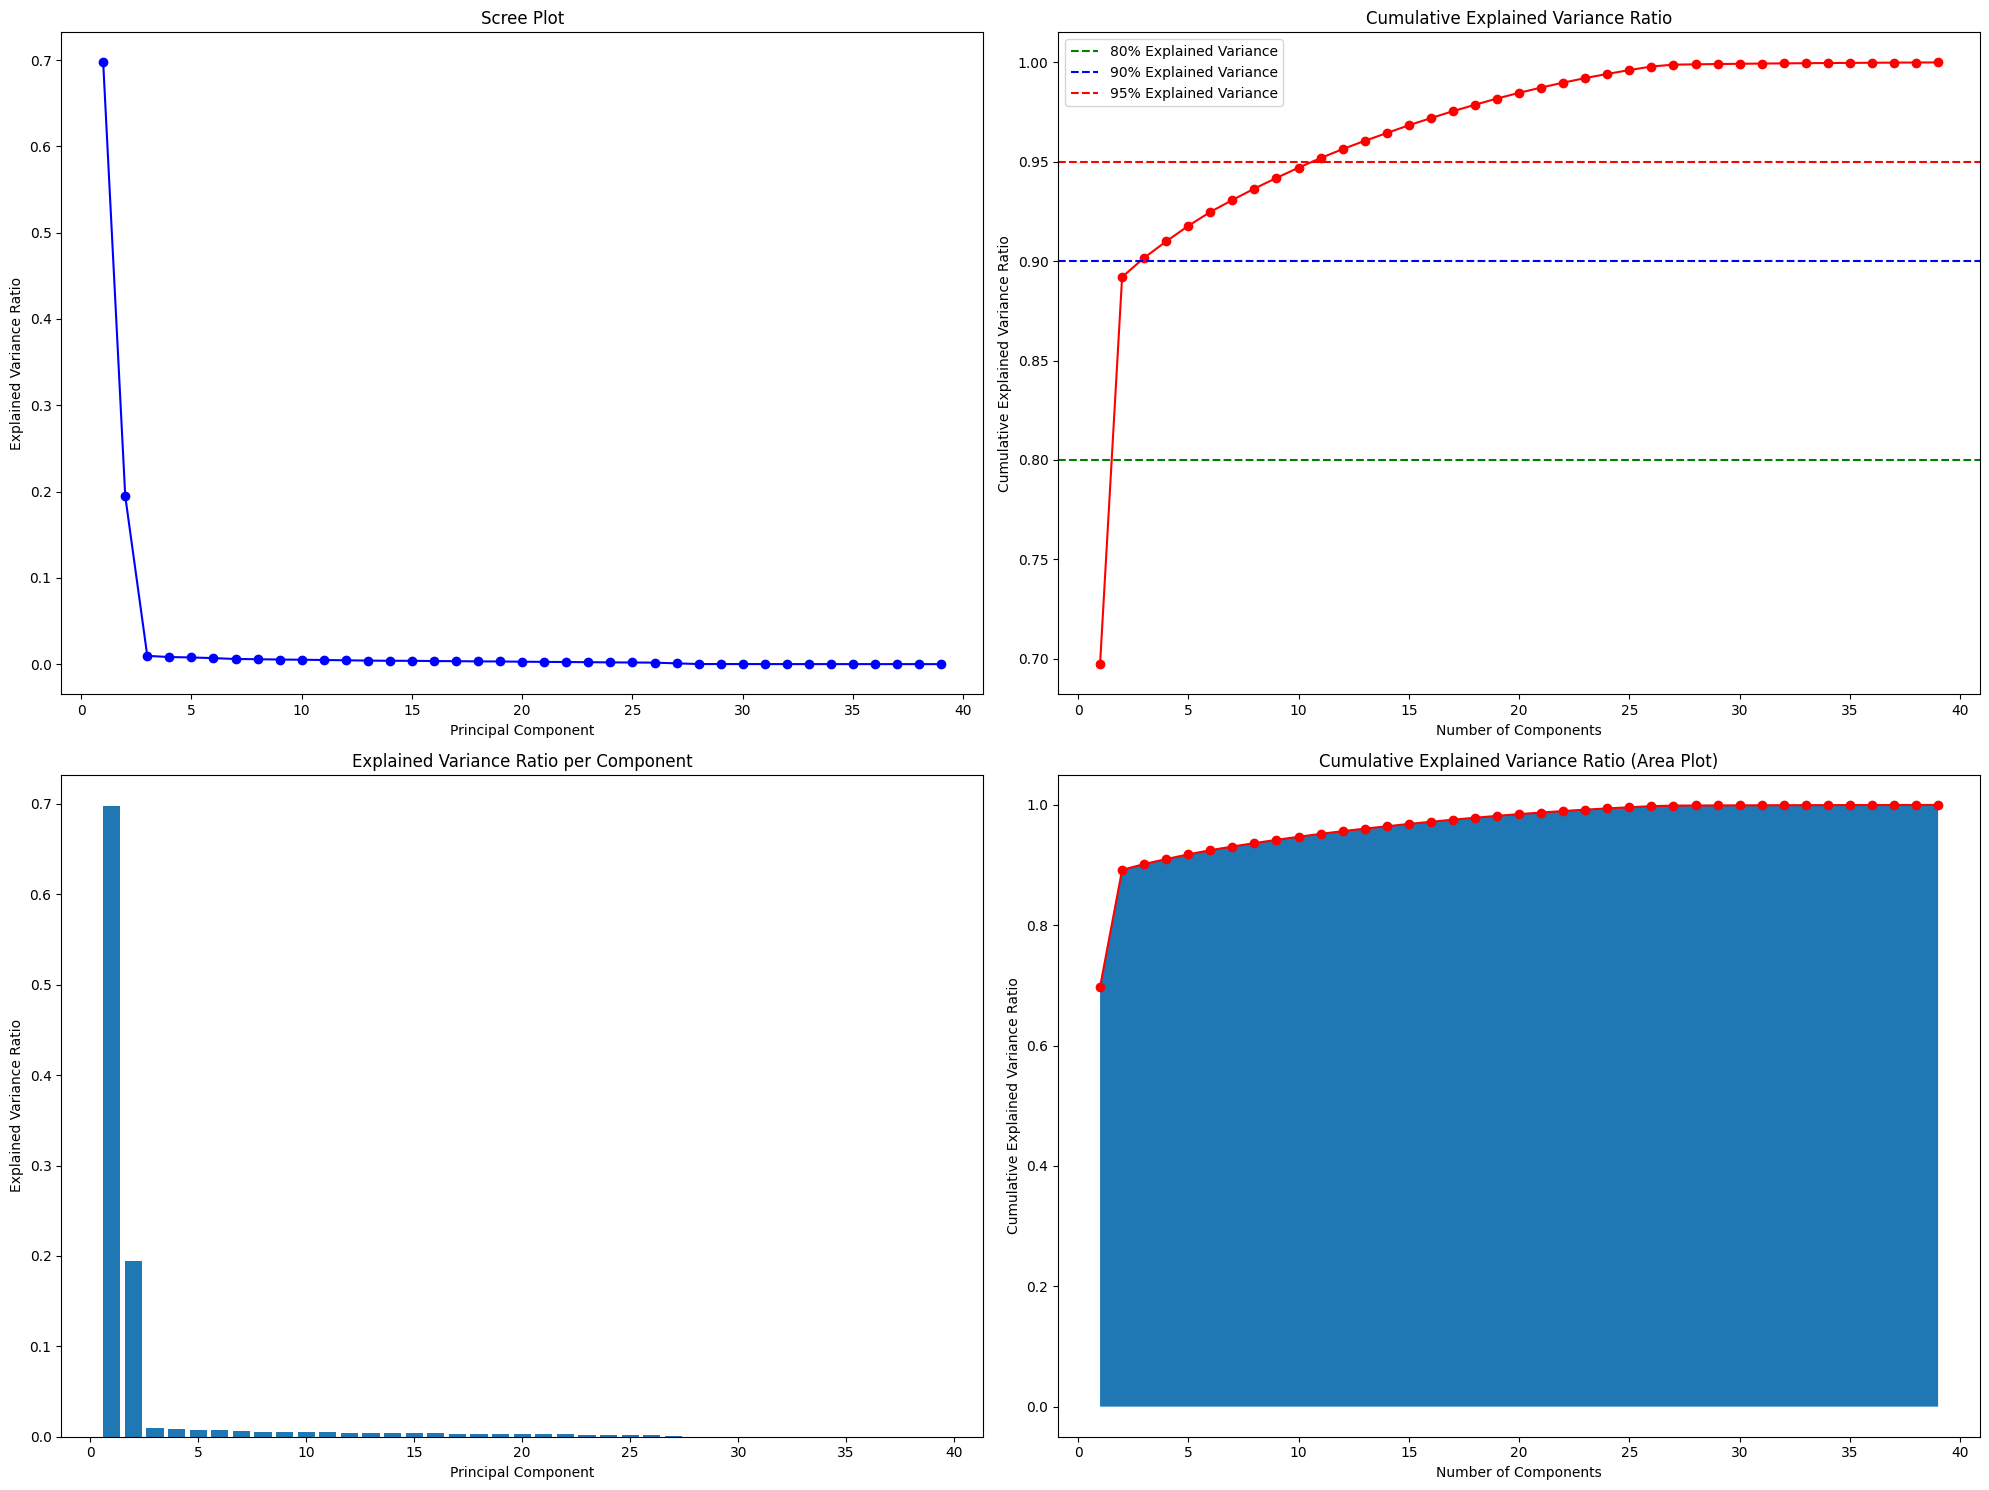

Total number of components: 39

Explained variance ratio for each component:
PC1: 0.6973
PC2: 0.1948
PC3: 0.0096
PC4: 0.0083
PC5: 0.0078
PC6: 0.0070
PC7: 0.0060
PC8: 0.0057
PC9: 0.0054
PC10: 0.0052
PC11: 0.0048
PC12: 0.0045
PC13: 0.0041
PC14: 0.0039
PC15: 0.0039
PC16: 0.0036
PC17: 0.0035
PC18: 0.0032
PC19: 0.0031
PC20: 0.0029
PC21: 0.0027
PC22: 0.0025
PC23: 0.0023
PC24: 0.0021
PC25: 0.0020
PC26: 0.0018
PC27: 0.0009
PC28: 0.0002
PC29: 0.0001
PC30: 0.0001
PC31: 0.0001
PC32: 0.0001
PC33: 0.0001
PC34: 0.0001
PC35: 0.0001
PC36: 0.0001
PC37: 0.0001
PC38: 0.0001
PC39: 0.0000

Number of components needed to explain:
70.0% of variance: 2
80.0% of variance: 2
90.0% of variance: 3
95.0% of variance: 11
99.0% of variance: 23

Optimal number of components (elbow method): 3

Shape of the transformed data: (1261, 3)


In [5]:
# Flatten the data
X_train_flat = train_df.iloc[:, 1:].values
X_valid_flat = valid_df.iloc[:, 1:].values
X_test_flat = test_df.iloc[:, 1:].values

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train_flat)
# skip standardization as the data is already standardized with same range
X_scaled = X_train_flat

# Step 2: Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Calculate explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Step 4: Create visualizations
plt.figure(figsize=(20, 15))

# Plot 1: Scree plot
plt.subplot(2, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot 2: Cumulative explained variance plot
plt.subplot(2, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# Add lines for 80%, 90%, and 95% explained variance
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Explained Variance')
plt.axhline(y=0.9, color='b', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()

# Plot 3: Explained variance for each component (bar plot)
plt.subplot(2, 2, 3)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance Ratio per Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot 4: Cumulative explained variance (area plot)
plt.subplot(2, 2, 4)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.fill_between(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.title('Cumulative Explained Variance Ratio (Area Plot)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

# Step 5: Print additional information
print("Total number of components:", len(explained_variance_ratio))
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {ratio:.4f}")

print("\nNumber of components needed to explain:")
for threshold in [0.7, 0.8, 0.9, 0.95, 0.99]:
    n_components = np.where(cumulative_variance_ratio >= threshold)[0][0] + 1
    print(f"{threshold*100}% of variance: {n_components}")

# Step 6: Determine optimal number of components (elbow method)
from kneed import KneeLocator
n_components_range = range(1, len(explained_variance_ratio) + 1)
kneedle = KneeLocator(n_components_range, explained_variance_ratio, curve='convex', direction='decreasing')
print(f"\nOptimal number of components (elbow method): {kneedle.elbow}")

# Step 7: Transform the data using the optimal number of components
optimal_n_components = kneedle.elbow
pca_optimal = PCA(n_components=optimal_n_components)
X_pca = pca_optimal.fit_transform(X_scaled)

print(f"\nShape of the transformed data: {X_pca.shape}")

In [6]:
from torch.utils.data import DataLoader, TensorDataset

# Apply PCA
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X_train_flat)

# Transform the data
X_train_pca = pca.transform(X_train_flat)
X_valid_pca = pca.transform(X_valid_flat)
X_test_pca = pca.transform(X_test_flat)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train_pca, dtype=torch.float32)
y_train = torch.tensor(train_df['label'].values, dtype=torch.long)
X_valid = torch.tensor(X_valid_pca, dtype=torch.float32)
y_valid = torch.tensor(valid_df['label'].values, dtype=torch.long)
X_test = torch.tensor(X_test_pca, dtype=torch.float32)
y_test = torch.tensor(test_df['label'].values, dtype=torch.long)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=120, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=120, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=120, shuffle=False)

torch.Size([1261, 3]) torch.Size([1261])
torch.Size([270, 3]) torch.Size([270])
torch.Size([273, 3]) torch.Size([273])


# Huấn luyện mô hình

In [7]:
import torch
from src.models.module2.ann import ANN

model = ANN(input_dim=3, output_dim=3, num_hidden=9, num_layers=3, dropout=0.5)
num_params = sum(p.numel() for p in model.parameters())
print(num_params)

246


In [8]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [9]:
# set seed
torch.manual_seed(97)

model.to('cuda')
criterion.to('cuda')

num_epochs = 300
best_valid_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Đánh giá mô hình trên tập validation
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)

    valid_loss /= len(valid_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss:.4f}, Validation Loss: {valid_loss:.4f}")

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model_PCA3_ANN_withoutAug.pth')

Epoch 1/300, Train Loss: 0.9645, Validation Loss: 1.1877
Epoch 2/300, Train Loss: 0.9649, Validation Loss: 1.1772
Epoch 3/300, Train Loss: 0.9657, Validation Loss: 1.1663
Epoch 4/300, Train Loss: 0.9672, Validation Loss: 1.1562
Epoch 5/300, Train Loss: 0.9684, Validation Loss: 1.1466
Epoch 6/300, Train Loss: 0.9692, Validation Loss: 1.1370
Epoch 7/300, Train Loss: 0.9706, Validation Loss: 1.1269
Epoch 8/300, Train Loss: 0.9713, Validation Loss: 1.1183
Epoch 9/300, Train Loss: 0.9724, Validation Loss: 1.1090
Epoch 10/300, Train Loss: 0.9737, Validation Loss: 1.0997
Epoch 11/300, Train Loss: 0.9749, Validation Loss: 1.0907
Epoch 12/300, Train Loss: 0.9757, Validation Loss: 1.0832
Epoch 13/300, Train Loss: 0.9766, Validation Loss: 1.0757
Epoch 14/300, Train Loss: 0.9769, Validation Loss: 1.0691
Epoch 15/300, Train Loss: 0.9771, Validation Loss: 1.0629
Epoch 16/300, Train Loss: 0.9773, Validation Loss: 1.0561
Epoch 17/300, Train Loss: 0.9779, Validation Loss: 1.0492
Epoch 18/300, Train Los

# Kiểm thử

## Trên tập valid


AUC Scores for each class:
0.9596912558513866

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.73      0.89      0.80        81
           2       0.92      0.76      0.83       117

    accuracy                           0.86       270
   macro avg       0.87      0.88      0.87       270
weighted avg       0.87      0.86      0.86       270



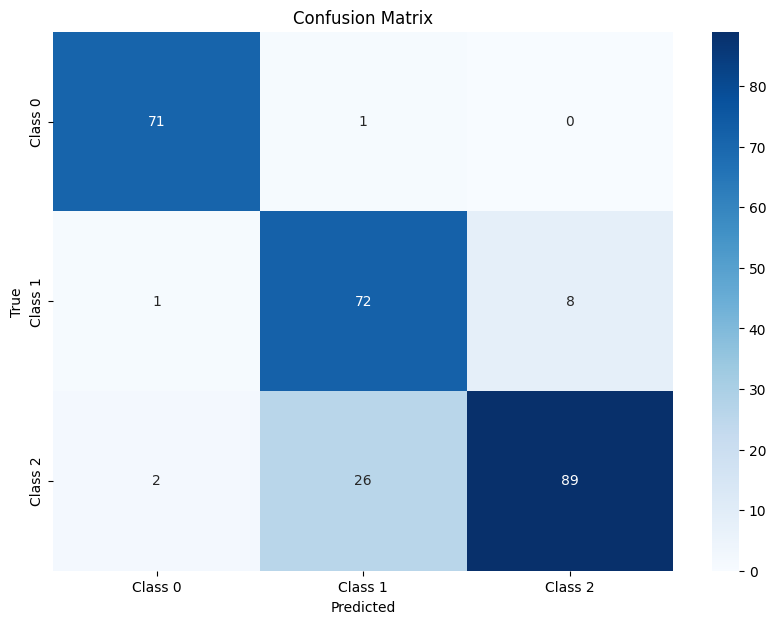

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Load mô hình tốt nhất
model.load_state_dict(torch.load('best_model_PCA3_ANN_withoutAug.pth', weights_only=True, map_location='cpu'))

# Dự đoán trên tập validation
model.eval()
y_true = []
y_pred = []
y_pred_prob = []  # Lưu xác suất dự đoán cho AUC
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        prob = F.softmax(outputs, dim=1)  # Chuyển đổi đầu ra thành xác suất
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_prob.extend(prob.cpu().numpy())  # Lưu xác suất dự đoán

# Chuyển đổi danh sách thành mảng NumPy
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Tính toán confusion matrix và classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Tính toán AUC cho từng lớp
try:
    auc_scores = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    print("\nAUC Scores for each class:")
    print(auc_scores)
except ValueError as e:
    print(f"ValueError: {e}")

print("\nClassification Report:")
print(class_report)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Trên tập test


AUC Scores for each class:
0.9542525186575923

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       0.66      0.94      0.78        82
           2       0.94      0.72      0.82       118

    accuracy                           0.84       273
   macro avg       0.87      0.86      0.85       273
weighted avg       0.88      0.84      0.84       273



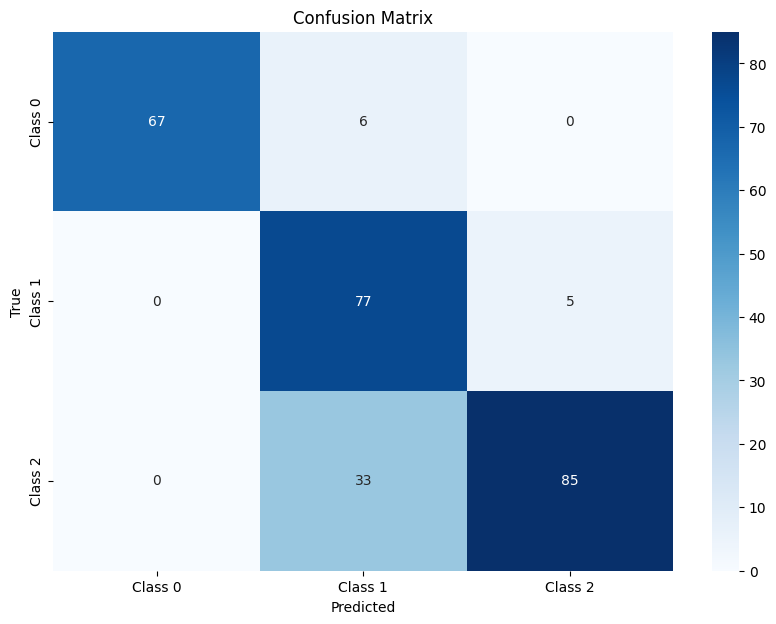

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Load mô hình tốt nhất
model.load_state_dict(torch.load('best_model_PCA3_ANN_withoutAug.pth', weights_only=True, map_location='cpu'))

# Dự đoán trên tập validation
model.eval()
y_true = []
y_pred = []
y_pred_prob = []  # Lưu xác suất dự đoán cho AUC
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        prob = F.softmax(outputs, dim=1)  # Chuyển đổi đầu ra thành xác suất
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_prob.extend(prob.cpu().numpy())  # Lưu xác suất dự đoán

# Chuyển đổi danh sách thành mảng NumPy
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Tính toán confusion matrix và classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Tính toán AUC cho từng lớp
try:
    auc_scores = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    print("\nAUC Scores for each class:")
    print(auc_scores)
except ValueError as e:
    print(f"ValueError: {e}")

print("\nClassification Report:")
print(class_report)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()